# Google Image Scraper

Hello everyone,

This Jupyter notebook provides a step-by-step guide on how to download images from Google using a Python script. The notebook leverages the `simple_image_download` library (yes, a creative name) to handle the task of fetching and downloading images or obtaining their URLs. Additionally, `matplotlib` is used to display the images.

This script is adapted from Abhay Parashar's amazing article: "17 Mindblowing Python Automation Scripts I Use Everyday."



Recommendations:
  - `simple-image-download 0.5` (Library for downloading images from google)
  -  `Python 3.10` (click on top right corner to change version)
  - `matplotlib 3.4.3` (Library for plotting graphs, but in this case it is used to display images)
  - `pillow` (Library for processing images, in this case: url --> image object --> plot using matplotlib)


# Download the dependencies required for this Jupyter Notebook

These commands will install the necessary packages `simple-image-download` and `matplotlib` that are used in the notebook.

In [20]:
%pip install simple-image-download
%pip install matplotlib


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
# Words or phrases you google images of:
keywords = ['cat', 'dog', 'bird']

# Number of images to download for each keyword:
num_images = [ 10, 5, 3]

# Notes: keywords and num_images must be alligned by index and consequently have the same length.

In [22]:
# Importing the libraries
from simple_image_download import simple_image_download as simp 

# Creating a response object
response = simp.simple_image_download

image_urls = {}

for word, num in zip(keywords, num_images):
    try:
        urls = response().urls(word, num+1) # first image is always the gstatic image
        image_urls[word] = urls[1:]
        print(f"URLs for {word}:")
        for url in urls[1:]:
            i = urls.index(url)
            print(f"\t image{i}:\t {url}")

    ## To download localy the images uncomment the following line
    # response().download(word, num)

    except Exception as e:
        print("An error occurred:", e)

URLs for cat:
	 image1:	 https://www.petz.com.br/blog/wp-content/uploads/2020/08/cat-sitter-felino.jpg
	 image2:	 https://i.natgeofe.com/n/548467d8-c5f1-4551-9f58-6817a8d2c45e/NationalGeographic_2572187_square.jpg
	 image3:	 https://www.shutterstock.com/image-photo/cat-yellow-face-sitting-on-600nw-2470054451.jpg
	 image4:	 https://t4.ftcdn.net/jpg/02/66/72/41/360_F_266724172_Iy8gdKgMa7XmrhYYxLCxyhx6J7070Pr8.jpg
	 image5:	 https://images.pexels.com/photos/45201/kitty-cat-kitten-pet-45201.jpeg?cs
	 image6:	 https://i.natgeofe.com/n/548467d8-c5f1-4551-9f58-6817a8d2c45e/NationalGeographic_2572187_3x4.jpg
	 image7:	 https://www.wfla.com/wp-content/uploads/sites/71/2023/05/GettyImages-1389862392.jpg?w
	 image8:	 https://cdn.britannica.com/70/234870-050-D4D024BB/Orange-colored-cat-yawns-displaying-teeth.jpg
	 image9:	 https://upload.wikimedia.org/wikipedia/commons/thumb/1/15/Cat_August_2010-4.jpg/1200px-Cat_August_2010-4.jpg
	 image10:	 https://upload.wikimedia.org/wikipedia/commons/thumb/3/3

# Displaying the images using Matplotlib



Displaying images for cat:


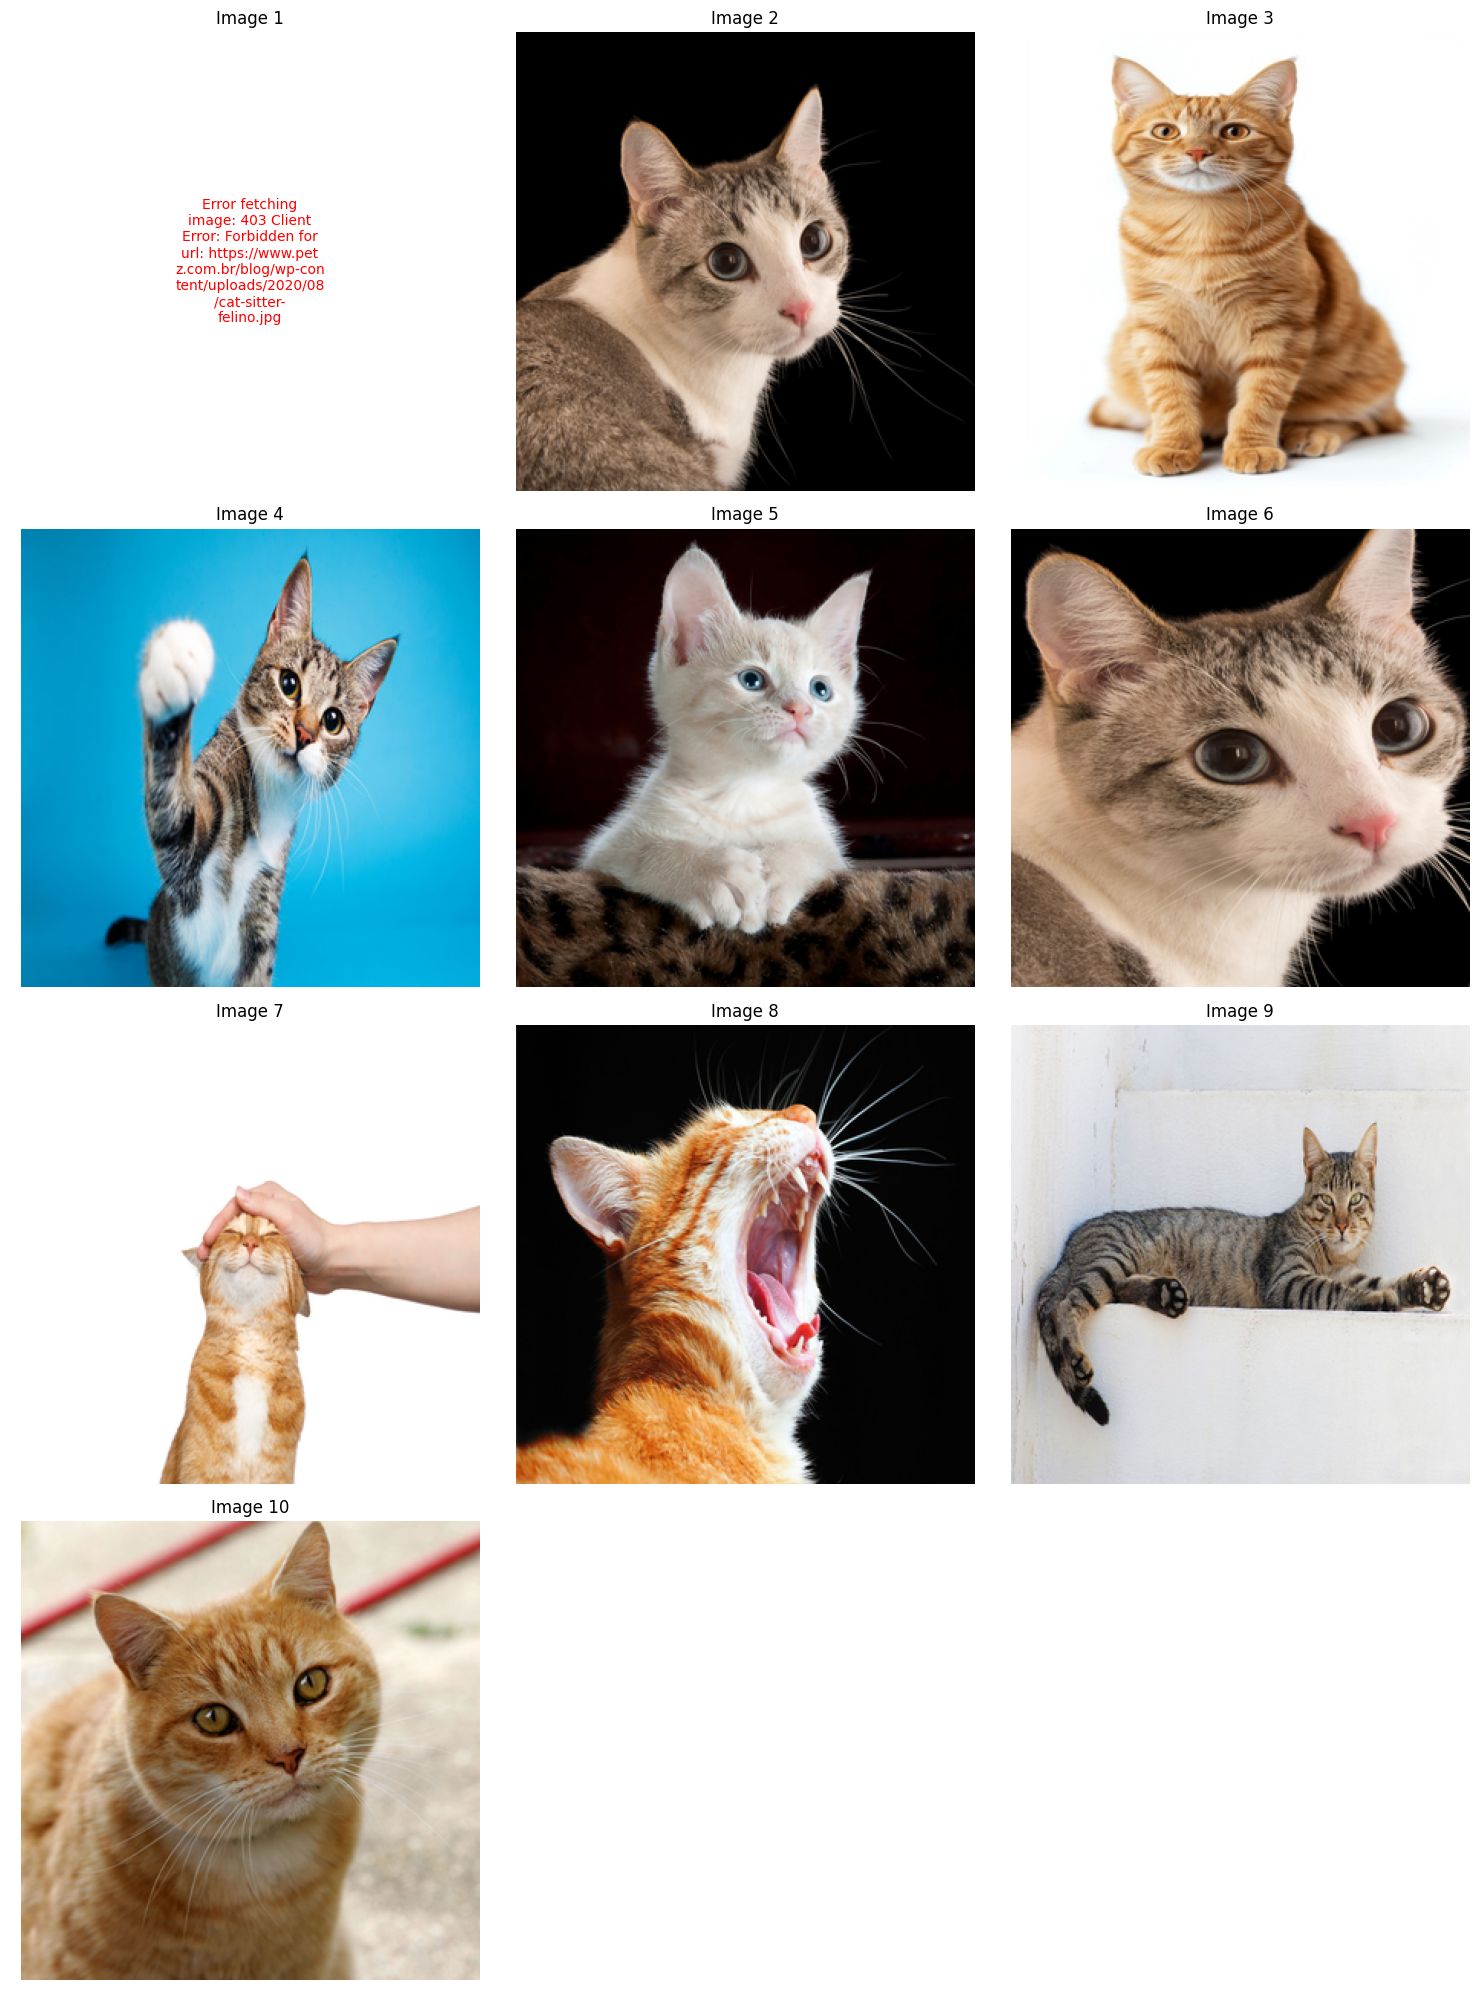

Displaying images for dog:


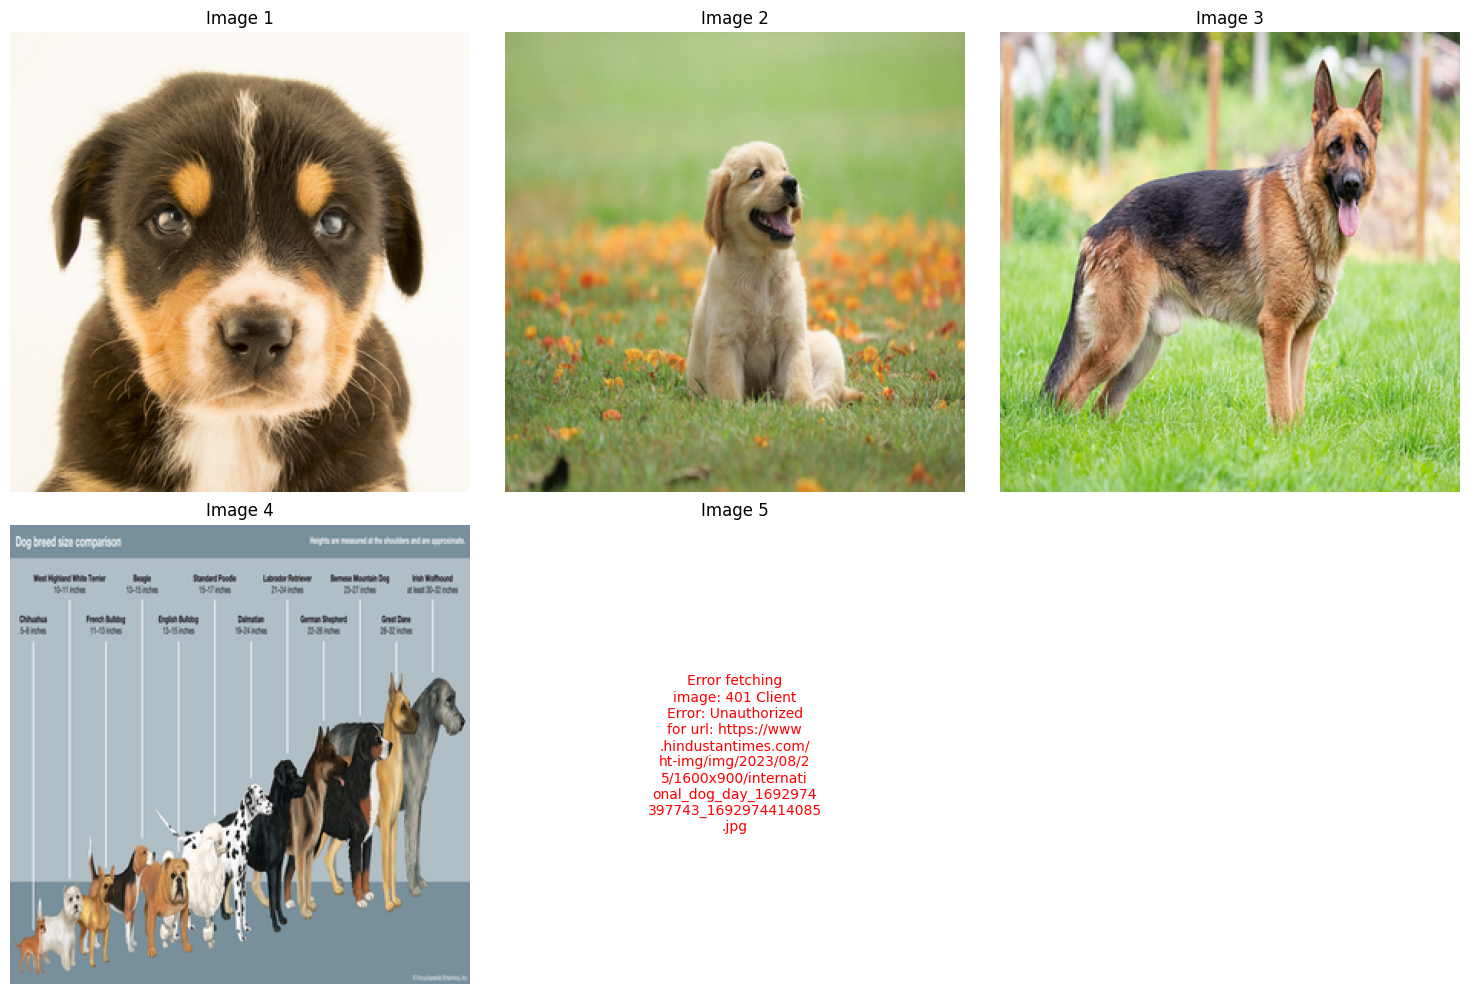

Displaying images for bird:


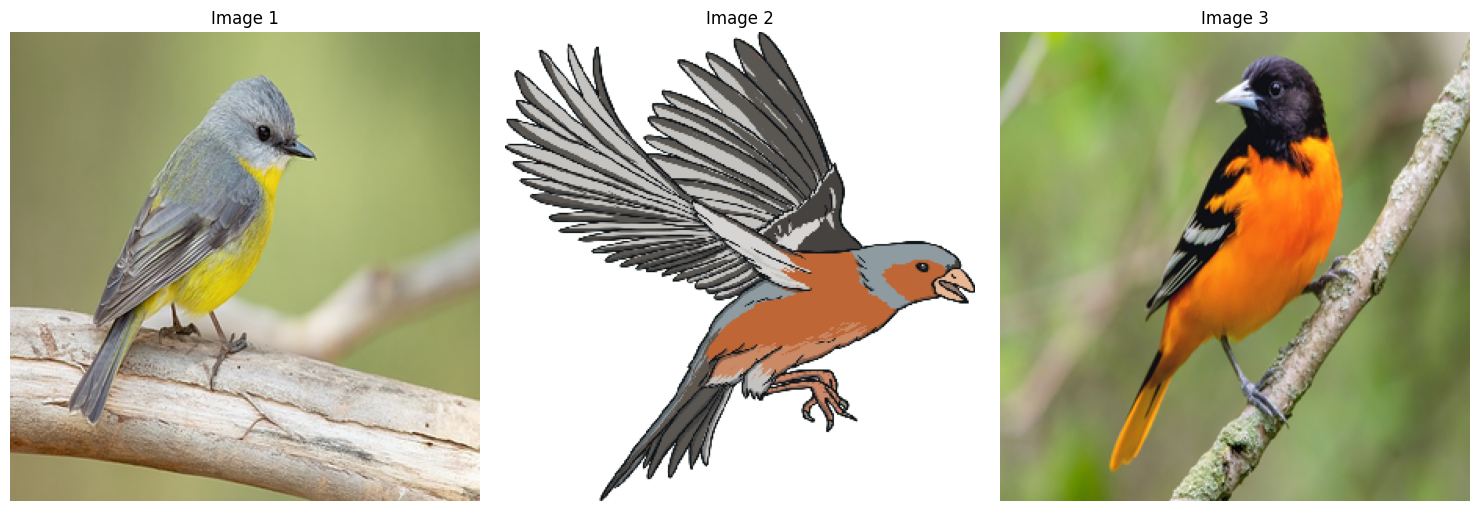

In [31]:
from PIL import Image, UnidentifiedImageError
import requests
from io import BytesIO
import math
import matplotlib.pyplot as plt
import textwrap

# Function to calculate the number of rows needed to display images in a grid
def create_image_array(num):
    return math.ceil(num / 3)

# Function to resize an image to the target size
def resize_image(image, target_size=(300, 300)):
    return image.resize(target_size, Image.LANCZOS)

# Function to display images from a list of URLs with a given title
def display_images(image_urls, word):
    num_images = len(image_urls)
    num_rows = create_image_array(num_images)

    # Create a figure with the appropriate size
    fig = plt.figure(figsize=(15, 5 * num_rows))
    

    for index, url in enumerate(image_urls, start=1):
        ax = fig.add_subplot(num_rows, 3, index)  # Add a subplot for each image
        ax.axis('off')  # Hide the axis

        try:
            # Fetch the image from the URL
            response = requests.get(url)
            response.raise_for_status()  # Raise an error if the request failed
            image = Image.open(BytesIO(response.content))

            # Resize the image
            resized_image = resize_image(image)

            # Plot the image on the subplot
            ax.imshow(resized_image)
        except UnidentifiedImageError:
            # Handle the case where the image cannot be identified
            error_message = "Error: Unable to identify image"
            wrapped_text = textwrap.fill(error_message, width=20)
            ax.text(0.5, 0.5, wrapped_text, ha='center', va='center', wrap=True, color='red')
        except requests.RequestException as e:
            # Handle the case where fetching the image fails
            error_message = f"Error fetching image: {str(e)}"
            wrapped_text = textwrap.fill(error_message, width=20)
            ax.text(0.5, 0.5, wrapped_text, ha='center', va='center', wrap=True, color='red')
        except Exception as e:
            # Handle any other unexpected errors
            error_message = f"Unexpected error: {str(e)}"
            wrapped_text = textwrap.fill(error_message, width=20)
            ax.text(0.5, 0.5, wrapped_text, ha='center', va='center', wrap=True, color='red')

        ax.set_title(f"Image {index}")  # Set a title for each subplot

    plt.tight_layout()
    plt.show()

# Display images for each word in the dictionary
for word, urls in image_urls.items():
    print(f"Displaying images for {word}:")
    display_images(urls, word)
